In [4]:
def nonintbinspectra(wvl, flux, uncer, binfactor):
    wvllog = np.log(wvl)
    nbins = float(len(wvllog))/binfactor
    if float(nbins).is_integer():
        N = binfactor - 0.000000000000001
    else:
        N = binfactor
    N1 = int(N)
    N3 = int(N)
    n = N - N1 
    n0 = N - N1
    N2 = int(np.ceil(N))
    i = 0
    k = 0
    obl = wvllog[i+1] - wvllog[i]
    obr = float(obl)/2
    nbl = obl*N
    nbr = float(nbl)/2
    brdiff = nbr - obr
    newbins = []
    newflux = []
    newuncer = []
    nbnctr = wvllog[i] + brdiff
    newbins.append(np.exp(nbnctr))
    newflux.append(flux[i:i + N1].sum() + n * flux[i + N1])
    newuncer.append(np.sqrt(np.sum(np.square(uncer[i:i + N1])) + np.square(n * uncer[i + N1])))
    while i + N1 + (int(N - 1 + n) + 1) <= len(wvllog) - 1:
        #print("OLD  " "i:",i + N1 + (int(N - 1 + n) + 1), "<=:",len(wvllog) - 1, "N1:",N1, "REP:", int(N - (1 - n)) + 1, "n:",n, "int(N - 1 + n):", int(N - 1 + n))
        i = i + N1
        k = k + N3
        N1 = int(N - (1 - n)) + 1
        N3 = int(N - (1 - n0)) + 1
        n0 = N - (N1 - n0)
        nbnctr +=  (1 - n) * (wvllog[i+1] - wvllog[i])  + wvllog[i + N1] - wvllog[i + 1] + n0 * (wvllog[i + N1] - wvllog[i + N1 - 1])
        newbins.append(np.exp(nbnctr))
        newflux.append((1 - n) * flux[i] + flux[i + 1:i + N1].sum() + n0 * flux[i + N1])
        newuncer.append(np.sqrt(np.square((1 - n) * uncer[i]) + np.sum(np.square(uncer[i + 1:i + N1])) + np.square(n0 * uncer[i + N1])))
        n = N - (N1 - n)
    return np.array(newbins), np.array(newflux), np.array(newuncer)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import array

In [72]:
f = np.ones(10)
wl = np.arange(1., 3., 0.2)
#wl = np.arange(4000., 4100., 5.)
w = np.exp(wl)
#f[20:21] = 2
#f[30:31] = 1.5
#f[40:41] = 0
#f[50:51] = 1.5
#f[60:61] = 2
f[4:7] = 0
#f[-1] = 0
#w[5]

In [73]:
f.shape, w.shape

((10,), (10,))

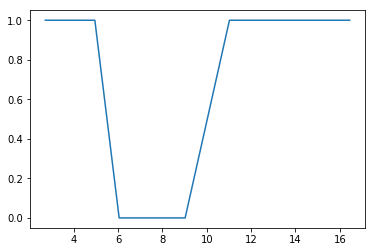

In [74]:
plt.plot(w,f)

In [75]:
ns = nonintbinspectra(w, f, f, 2.0)
ns[0].shape

(5,)

In [30]:
ns2 = nonintbinspectra(w, f, f, N)
ns2[0].shape, int(len(w)/N)

((10,), 10)

In [76]:
w2 = ns[0]
f2 = ns[1]

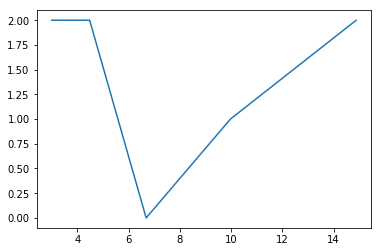

In [77]:
plt.plot(w2, f2)

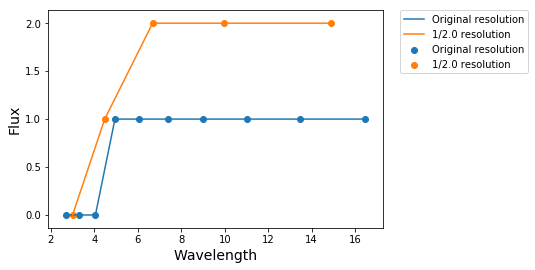

In [48]:
plt.plot(w, f, label="Original resolution")
plt.scatter(w, f, label="Original resolution")
plt.plot(w2, f2, label="1/2.0 resolution")
plt.scatter(w2, f2, label="1/2.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [59]:
np.diff(wl), np.diff(np.log(w2)), np.diff(w), np.diff(w2)

(array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]),
 array([0.4, 0.4, 0.4, 0.4]),
 array([0.60183509, 0.73508304, 0.89783246, 1.09661504, 1.33940863,
        1.6359574 , 1.99816288, 2.44056165, 2.98090874]),
 array([1.47752305, 2.20420537, 3.28828801, 4.90554927]))

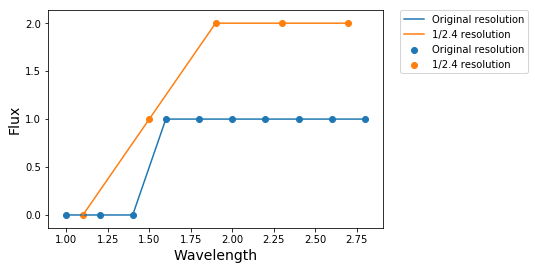

In [49]:
plt.plot(wl, f, label="Original resolution")
plt.scatter(wl, f, label="Original resolution")
plt.plot(np.log(w2), f2, label="1/2.4 resolution")
plt.scatter(np.log(w2), f2, label="1/2.4 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [230]:
0 + 0 + 0.4 * 1, 0.6 * 1 + 1 + 0.8 * 1, 0.2 * 1 + 1 + 1 + 0.2 * 1, 0.8 * 1 + 1 + 0.6 * 1

(0.4, 2.4000000000000004, 2.4000000000000004, 2.4)

In [238]:
f2

array([0.4, 2.4, 2.4, 2.4])

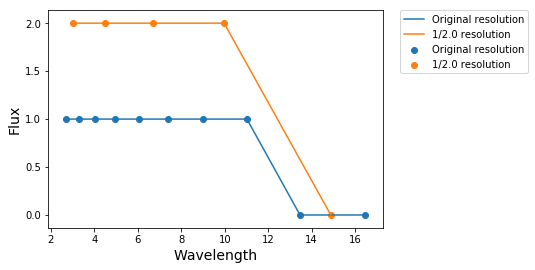

In [55]:
plt.plot(w, f, label="Original resolution")
plt.scatter(w, f, label="Original resolution")
plt.plot(w2, f2, label="1/2.0 resolution")
plt.scatter(w2, f2, label="1/2.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

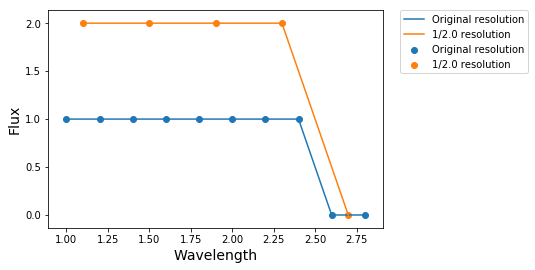

In [56]:
plt.plot(wl, f, label="Original resolution")
plt.scatter(wl, f, label="Original resolution")
plt.plot(np.log(w2), f2, label="1/2.0 resolution")
plt.scatter(np.log(w2), f2, label="1/2.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [226]:
1 + 1 + 0.4 * 1, 0.6 * 1 + 1 + 0.8 * 1, 0.2 * 1 + 1 + 1 + 0.2 * 1, 0.8 * 1 + 0 + 0 * 0.6

(2.4, 2.4000000000000004, 2.4000000000000004, 0.8)

In [227]:
f2

array([2.4, 2.4, 2.4, 0.8])

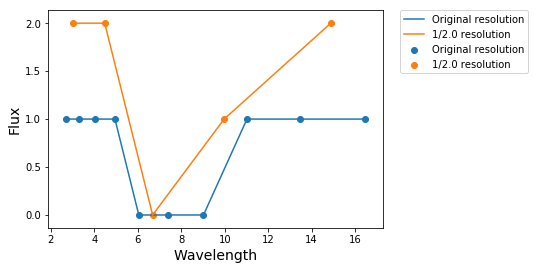

In [78]:
plt.plot(w, f, label="Original resolution")
plt.scatter(w, f, label="Original resolution")
plt.plot(w2, f2, label="1/2.0 resolution")
plt.scatter(w2, f2, label="1/2.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

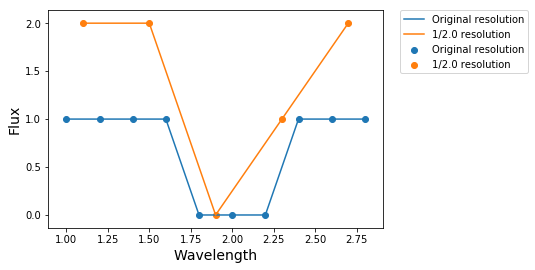

In [79]:
plt.plot(wl, f, label="Original resolution")
plt.scatter(wl, f, label="Original resolution")
plt.plot(np.log(w2), f2, label="1/2.0 resolution")
plt.scatter(np.log(w2), f2, label="1/2.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)